<a href="https://colab.research.google.com/github/omch79/my_repository/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pupils='https://drive.google.com/file/d/1eSph6lQlDB3jhUninzS_pxvXj52hKdz9/view?usp=sharing'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('pupils.csv',delimiter=',')
data

,Отметка времени,Укажи фамилию и имя (по желанию),Укажи класс,"1.Те, кто критикует происходящее в стране, не могут считаться настоящими патриотами","2.Бродячих собак надо уничтожать, потому что они могут быть опасны","3.Любые ссоры можно уладить, не прибегая к дракам",4.Я способен с радостью выполнять разную работу,"5.То, что взрослые называют культурными ценностями прошлого, на самом деле часто оказывается старой рухлядью","6.Даже если мне что-то непонятно на уроке, я не стану задавать уточняющие вопросы учителю - ведь это не так уж и важно","7.Человек, совершивший преступление, в будущем никогда не может стать хорошим",8.Даже самые странные люди с самыми необычными увлечениями должны иметь право защищать себя и свои взгляды,9.Занятия физкультурой и спортом - необходимость для здоровья каждого человека,10.Большинство моих сверстников предпочитает общаться с красивыми людьми,"11.Мне повезло, что я живу именно в России","12.Человек - царь природы, а потому он может делать с ней все, что захочет","13.Люди, выступающие против войны, наверное, просто трусы",14.Физическим трудом занимаются одни неудачники,"15.Внешний вид - показатель уважения не только к себе, но и к окружающим",16.Я люблю узнавать значения незнакомых мне слов,"17.Наша страна станет лучше, если мы избавимся от всех психически больных людей","18.Есть такие народы, которые не заслужили, чтобы к ним хорошо относились","19.Я думаю, что курение и алкоголь помогают людям расслабиться, снять напряжение после трудной работы","20.Я часто недоволен тем, как я живу","21. Когда вырасту, я буду стараться защищать свою Родину",22.Держать животных в передвижных зверинцах - бесчеловечно,23.Фильмы-боевики со стрельбой и кровью помогают детям стать смелыми и мужественными,"24.Работа дворника не менее важна, чем любая другая работа",25.Нецензурные выражения в общении - признак бескультурья,26.Учеба - занятие только для зануд и зубрил,"27.Убийство человека может быть оправдано, если совершенно ради торжества справедливости","28.Мне кажется, что большинство преступлений в нашем районе совершают люди, приехавшие к нам из других мест","29.Я считаю, что от одной дозы наркотиков нельзя стать наркоманом","30.Я очень сильно переживаю любые свои неудачи, даже самые маленькие","31.День Победы (9 Мая) - праздник не для всех, а только для ветеранов и пожилых людей","32.Торговля животными, занесенными в Красную книгу, - неплохой способ заработать деньги","33.К военнопленным можно относиться жестоко, ведь они наши враги","34.Я хотел бы подрабатывать в свободное время, если это не будет мешать учебе","35.Если ребенок резко перебивает разговор взрослых, в этом нет ничего страшного - ребенок тоже имеет право высказаться","36.Человек не может всего знать, поэтому меня и не волнует, что я не знаю многих важных вещей","37.Лучше отпустить на свободу 10 преступников, чем казнить одного невиновного человека","38.Судейство в отношении ""наших"" на международных соревнованиях часто несправедливо, потому что россиян никто не любит","39.Все известные, прославленные люди стараются поддерживать хорошую физическую форму",40.Мне тяжело знакомиться с новыми людьми: я часто при этом стесняюсь и смущаюсь,"41.Мне не нравится, когда исполняется наш гимн - это скучно и приходится все время вставать",42.Убирать чужой мусор на туристических стоянках - глупое занятие,43.Уступить в споре - значит показать свою слабость,44.Хорошая учеба - это тоже важный и серьезный труд,"45.На стенах подъезда можно рисовать и писать все, что вздумается","46.Мне нравится копаться в энциклопедиях, журналах, словарях: там можно найти много интересного","47.Я плохо себя чувствую, когда окружающие меня люди чем-то расстроены",48.Несправедливо ставить людей с темным цветом кожи руководителями над белыми людьми,"49.Я больше люблю подвижные игры, занятие спортом или рыбалкой, чем сидение у компьютера или телевизора",50.Я неловко себя чувствую в незнакомой компании,"51.Бывает, что я испытываю сильное волнение и чувство гордости, когда слышу песни о 

In [4]:
data_f=data.iloc [:,2:-1]
data_f.head()

,Укажи класс,"1.Те, кто критикует происходящее в стране, не могут считаться настоящими патриотами","2.Бродячих собак надо уничтожать, потому что они могут быть опасны","3.Любые ссоры можно уладить, не прибегая к дракам",4.Я способен с радостью выполнять разную работу,"5.То, что взрослые называют культурными ценностями прошлого, на самом деле часто оказывается старой рухлядью","6.Даже если мне что-то непонятно на уроке, я не стану задавать уточняющие вопросы учителю - ведь это не так уж и важно","7.Человек, совершивший преступление, в будущем никогда не может стать хорошим",8.Даже самые странные люди с самыми необычными увлечениями должны иметь право защищать себя и свои взгляды,9.Занятия физкультурой и спортом - необходимость для здоровья каждого человека,10.Большинство моих сверстников предпочитает общаться с красивыми людьми,"11.Мне повезло, что я живу именно в России","12.Человек - царь природы, а потому он может делать с ней все, что захочет","13.Люди, выступающие против войны, наверное, просто трусы",14.Физическим трудом занимаются одни неудачники,"15.Внешний вид - показатель уважения не только к себе, но и к окружающим",16.Я люблю узнавать значения незнакомых мне слов,"17.Наша страна станет лучше, если мы избавимся от всех психически больных людей","18.Есть такие народы, которые не заслужили, чтобы к ним хорошо относились","19.Я думаю, что курение и алкоголь помогают людям расслабиться, снять напряжение после трудной работы","20.Я часто недоволен тем, как я живу","21. Когда вырасту, я буду стараться защищать свою Родину",22.Держать животных в передвижных зверинцах - бесчеловечно,23.Фильмы-боевики со стрельбой и кровью помогают детям стать смелыми и мужественными,"24.Работа дворника не менее важна, чем любая другая работа",25.Нецензурные выражения в общении - признак бескультурья,26.Учеба - занятие только для зануд и зубрил,"27.Убийство человека может быть оправдано, если совершенно ради торжества справедливости","28.Мне кажется, что большинство преступлений в нашем районе совершают люди, приехавшие к нам из других мест","29.Я считаю, что от одной дозы наркотиков нельзя стать наркоманом","30.Я очень сильно переживаю любые свои неудачи, даже самые маленькие","31.День Победы (9 Мая) - праздник не для всех, а только для ветеранов и пожилых людей","32.Торговля животными, занесенными в Красную книгу, - неплохой способ заработать деньги","33.К военнопленным можно относиться жестоко, ведь они наши враги","34.Я хотел бы подрабатывать в свободное время, если это не будет мешать учебе","35.Если ребенок резко перебивает разговор взрослых, в этом нет ничего страшного - ребенок тоже имеет право высказаться","36.Человек не может всего знать, поэтому меня и не волнует, что я не знаю многих важных вещей","37.Лучше отпустить на свободу 10 преступников, чем казнить одного невиновного человека","38.Судейство в отношении ""наших"" на международных соревнованиях часто несправедливо, потому что россиян никто не любит","39.Все известные, прославленные люди стараются поддерживать хорошую физическую форму",40.Мне тяжело знакомиться с новыми людьми: я часто при этом стесняюсь и смущаюсь,"41.Мне не нравится, когда исполняется наш гимн - это скучно и приходится все время вставать",42.Убирать чужой мусор на туристических стоянках - глупое занятие,43.Уступить в споре - значит показать свою слабость,44.Хорошая учеба - это тоже важный и серьезный труд,"45.На стенах подъезда можно рисовать и писать все, что вздумается","46.Мне нравится копаться в энциклопедиях, журналах, словарях: там можно найти много интересного","47.Я плохо себя чувствую, когда окружающие меня люди чем-то расстроены",48.Несправедливо ставить людей с темным цветом кожи руководителями над белыми людьми,"49.Я больше люблю подвижные игры, занятие спортом или рыбалкой, чем сидение у компьютера или телевизора",50.Я неловко себя чувствую в незнакомой компании,"51.Бывает, что я испытываю сильное волнение и чувство гордости, когда слышу песни о своей Родине","52.Нет ничего страшного, если посл

Text(0.5, 0, 'Класс')

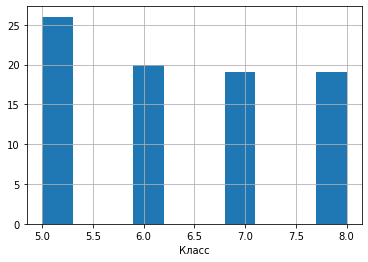

In [5]:
#оценим количество респондентов
data_f['Укажи класс'].hist().set_xlabel('Класс')

In [6]:
df = data_f.set_axis([str(i) for i in range(71)],axis='columns')
df=df.rename({'0': 'Класс'}, axis='columns')
df



,Класс,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,6,"-3 (нет, конечно)","-3 (нет, конечно)","+4 (несомненно, да)","+3 (да, конечно)","+2 (в общем, да)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-3 (нет, конечно)","-4 (нет, абсолютно неверно)","+3 (да, конечно)","+2 (в общем, да)","-3 (нет, конечно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-3 (нет, конечно)","+4 (несомненно, да)","+4 (несомненно, да)","-3 (нет, конечно)","+4 (несомненно, да)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+2 (в общем, да)","+4 (несомненно, да)","+3 (да, конечно)","-3 (нет, конечно)","-4 (нет, абсолютно неверно)","-3 (нет, конечно)","-2 (в общем, нет)","-3 (нет, конечно)","-3 (нет, конечно)","+1 (скорее да, чем нет)","+2 (в общем, да)","+1 (скорее да, чем нет)","-3 (нет, конечно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+3 (да, конечно)","-3 (нет, конечно)","+2 (в общем, да)","+3 (да, конечно)","-3 (нет, конечно)","+3 (да, конечно)","-3 (нет, конечно)","+3 (да, конечно)","+3 (да, конечно)","-3 (нет, конечно)","-3 (нет, конечно)","-4 (нет, абсолютно неверно)","-3 (нет, конечно)","+3 (да, конечно)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","+3 (да, конечно)","+3 (да, конечно)","+4 (несомненно, да)","-3 (нет, конечно)","+3 (да, конечно)","-3 (нет, конечно)","-3 (нет, конечно)","-3 (нет, конечно)","-3 (нет, конечно)","-3 (нет, конечно)","-3 (нет, конечно)"
1,8,"+1 (скорее да, чем нет)","+1 (скорее да, чем нет)","+4 (несомненно, да)","+1 (скорее да, чем нет)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","+1 (скорее да, чем нет)","+4 (несомненно, да)","+4 (несомненно, да)","-1 (скорее нет, чем да)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-2 (в общем, нет)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","+4 (несомненно, да)","+1 (скорее да, чем нет)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","+1 (скорее да, чем нет)","-1 (скорее нет, чем да)","+4 (несомненно, да)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","-1 (скорее нет, чем да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","-1 (скорее нет, чем да)","-1 (скорее нет, чем да)","-1 (скорее нет, чем да)","+1 (скорее да, чем нет)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","+1 (скорее да, чем нет)","+3 (да, конечно)","+4 (несомненно, да)","+4 (несомненно, да)","-1 (скорее нет, чем да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","+1 (скорее да, чем нет)","+4 (несомненно, да)","+4 (несомненно, да)","-1 (скорее нет, чем да)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-1 (скорее нет, чем да)","-1 (скорее нет, чем да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)"
2,6,0 (ни да ни нет),"+2 (в общем, да)","+4 (несомненно, да)","+3 (да, конечно)","+1 (скорее да, чем нет)","-3 (нет, конечно)","+1 (скорее да, чем нет)","+3 (да, конечно)","+3 (да, конечно)",0 (ни да ни нет),"+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-3 (нет, конечно)","-4 (нет, абсолютно неверно)","-3 (нет, конечно)","+3 (да, конечно)","+2 (в общем, да)",0 (ни да ни нет),"-4 (

In [7]:
#Переводим ответы учеников в числовые значения
df[:] = np.where((df[:]=="0 (ни да ни нет)"), 0,df[:])
df[:] = np.where((df[:]=="+1 (скорее да, чем нет)"), 1,df[:])
df[:] = np.where((df[:]=="-1 (скорее нет, чем да)"), -1,df[:])
df[:] = np.where((df[:]=="+2 (в общем, да)"), 2,df[:])
df[:] = np.where((df[:]=="-2 (в общем, нет)"), -2,df[:])
df[:] = np.where((df[:]=="+3 (да, конечно)"), 3,df[:])
df[:] = np.where((df[:]=="-3 (нет, конечно)"), -3,df[:])
df[:] = np.where((df[:]=="+4 (несомненно, да)"), 4,df[:])
df[:] = np.where((df[:]=="-4 (нет, абсолютно неверно)"), -4,df[:])
df.head()

,Класс,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,6,-3,-3,4,3,2,1,-4,4,4,-4,4,-4,-3,-4,3,2,-3,-4,-4,-3,4,4,-3,4,4,-4,-4,2,4,3,-3,-4,-3,-2,-3,-3,1,2,1,-3,-4,-4,-4,3,-3,2,3,-3,3,-3,3,3,-3,-3,-4,-3,3,1,-4,3,3,4,-3,3,-3,-3,-3,-3,-3,-3
1,8,1,1,4,1,1,-4,1,4,4,-1,4,-4,-2,-4,4,4,1,4,-4,-4,4,1,-1,4,4,-4,-4,1,-4,4,-1,-4,-4,4,-1,-1,-1,1,4,-4,-4,-4,-4,4,-4,1,3,4,4,-1,-4,-4,1,-4,-4,-4,4,1,-4,1,4,4,-1,4,-4,-4,-1,-1,-4,-4
2,6,0,2,4,3,1,-3,1,3,3,0,4,-4,-3,-4,-3,3,2,0,-4,-2,3,-1,-2,0,3,-2,0,0,-4,2,-4,-4,-1,3,-1,-1,4,0,0,-1,-4,-2,-1,3,-4,0,2,4,1,3,4,-4,-1,-3,-3,-4,0,-1,-4,-2,4,4,-3,2,-3,-1,-4,0,-4,-3
3,6,0,-3,4,0,1,-1,-1,4,4,2,0,-3,-4,-1,-4,-4,-1,-4,0,0,0,0,0,4,-1,0,-1,-4,2,-3,-3,-4,2,3,4,0,2,0,1,-2,0,0,-3,0,-1,-2,1,0,-1,-1,0,-2,0,1,0,1,2,-3,-1,4,-2,3,-1,0,-1,0,-2,-1,0,0
4,6,0,-3,4,-1,-1,1,2,3,4,2,1,-3,-4,-3,0,-3,-4,-4,-3,0,0,0,0,4,-1,-2,-2,-3,2,2,-3,-4,0,3,2,2,4,2,1,-1,0,-1,-3,0,-1,-1,1,0,-1,1,0,-4,0,-1,0,-2,2,-3,2,2,-1,3,-3,0,-1,0,-1,-1,0,0


In [8]:
#Согласно методике подсчета необходимо заменить значения в некторых столбцах на противоположные
df['1'] = - df['1'];df['31'] = - df['31'];df['41'] = - df['41'];
df['2'] = - df['2'];df['12'] = - df['12'];df['32'] = - df['32'];df['42'] = - df['42'];df['52'] = - df['52'];
df['13'] = - df['13'];df['23'] = - df['23'];df['33'] = - df['33'];df['43'] = - df['43'];df['53'] = - df['53'];
df['14'] = - df['14'];df['54'] = - df['54'];
df['5'] = - df['5'];df['35'] = - df['35'];df['45'] = - df['45'];df['55'] = - df['55'];df['65'] = - df['65'];
df['6'] = - df['6'];df['26'] = - df['26'];df['36'] = - df['36'];df['56'] = - df['56'];df['66'] = - df['66'];
df['7'] = - df['7'];df['17'] = - df['17'];df['27'] = - df['27'];df['67'] = - df['67'];
df['18'] = - df['18'];df['28'] = - df['28'];df['38'] = - df['38'];df['48'] = - df['48'];df['58'] = - df['58'];df['68'] = - df['68'];
df['19'] = - df['19'];df['29'] = - df['29'];df['59'] = - df['59'];df['69'] = - df['69'];
df['10'] = - df['10'];df['20'] = - df['20'];df['30'] = - df['30'];df['40'] = - df['40'];df['50'] = - df['50'];df['70'] = - df['70']
df

,Класс,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,6,3,3,4,3,-2,-1,4,4,4,4,4,4,3,4,3,2,3,4,4,3,4,4,3,4,4,4,4,-2,-4,-3,3,4,3,-2,3,3,1,-2,1,3,4,4,4,3,3,2,3,3,3,3,3,-3,3,3,4,3,3,-1,4,3,3,4,-3,3,3,3,3,3,3,3
1,8,-1,-1,4,1,-1,4,-1,4,4,1,4,4,2,4,4,4,-1,-4,4,4,4,1,1,4,4,4,4,-1,4,-4,1,4,4,4,1,1,-1,-1,4,4,4,4,4,4,4,1,3,-4,4,1,-4,4,-1,4,4,4,4,-1,4,1,4,4,-1,4,4,4,1,1,4,4
2,6,0,-2,4,3,-1,3,-1,3,3,0,4,4,3,4,-3,3,-2,0,4,2,3,-1,2,0,3,2,0,0,4,-2,4,4,1,3,1,1,4,0,0,1,4,2,1,3,4,0,2,-4,1,-3,4,4,1,3,3,4,0,1,4,-2,4,4,-3,2,3,1,4,0,4,3
3,6,0,3,4,0,-1,1,1,4,4,-2,0,3,4,1,-4,-4,1,4,0,0,0,0,0,4,-1,0,1,4,-2,3,3,4,-2,3,-4,0,2,0,1,2,0,0,3,0,1,-2,1,0,-1,1,0,2,0,-1,0,-1,2,3,1,4,-2,3,-1,0,1,0,2,1,0,0
4,6,0,3,4,-1,1,-1,-2,3,4,-2,1,3,4,3,0,-3,4,4,3,0,0,0,0,4,-1,2,2,3,-2,-2,3,4,0,3,-2,-2,4,-2,1,1,0,1,3,0,1,-1,1,0,-1,-1,0,4,0,1,0,2,2,3,-2,2,-1,3,-3,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8,-2,4,4,3,2,4,-1,4,4,0,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,3,0,0,4,0,4,4,4,2,3,0,0,0,0,4,4,3,3,3,4,4,0,3,1,4,4,4,0,4,4,-2,4,0,4,4,3,3,0,2,4,4,0,4,4,4
80,5,1,-4,4,2,0,4,-1,4,4,-1,4,1,0,4,4,2,0,4,4,0,2,1,4,4,4,4,1,-2,4,-3,3,4,0,4,-2,1,1,-2,-2,3,4,2,1,4,3,4,3,-3,2,-1,3,3,0,4,3,4,0,0,4,-2,2,3,1,2,1,1,-2,0,2,-2
81,8,4,-1,3,2,1,0,4,4,4,-2,0,0,4,4,0,4,-2,4,2,-4,-2,1,0,4,3,-1,3,0,-2,1,-4,4,4,4,-3,2,0,-1,4,-3,2,0,2,3,4,2,2,-2,-3,-2,0,4,4,-1,2,0,4,4,-4,4,-2,4,0,-2,1,4,4,4,1,0
82,8,1,0,4,4,4,-1,4,0,4,-1,4,4,3,4,3,3,0,4,4,3,4,4,4,4,2,3,4,4,4,4,3,4,4,4,4,0,0,3,1,1,4,3,-1,4,4,1,1,4,4,3,4,4,0,4,1,3,4,3,4,4,4,4,-2,4,2,0,1,3,3,3


In [9]:
#Подсчитываем сумму баллов по каждой шкале
df['Сумма,1шк']=df.iloc[:,[1,11,21,31,41,51,61]].sum(axis=1)
df['Сумма,2шк']=df.iloc[:,[2,12,22,32,42,52,62]].sum(axis=1)
df['Сумма,3шк']=df.iloc[:,[3,13,23,33,43,53,63]].sum(axis=1)
df['Сумма,4шк']=df.iloc[:,[4,14,24,34,44,54,64]].sum(axis=1)
df['Сумма,5шк']=df.iloc[:,[5,15,25,35,45,54,65]].sum(axis=1)
df['Сумма,6шк']=df.iloc[:,[6,16,26,36,46,56,66]].sum(axis=1)
df['Сумма,7шк']=df.iloc[:,[7,17,27,37,47,57,67]].sum(axis=1)
df['Сумма,8шк']=df.iloc[:,[8,18,28,38,48,58,68]].sum(axis=1)
df['Сумма,9шк']=df.iloc[:,[9,19,29,39,49,59,68]].sum(axis=1)
df['Сумма,10шк']=df.iloc[:,[10,20,30,40,50,60,70]].sum(axis=1)
df

,Класс,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,"Сумма,1шк","Сумма,2шк","Сумма,3шк","Сумма,4шк","Сумма,5шк","Сумма,6шк","Сумма,7шк","Сумма,8шк","Сумма,9шк","Сумма,10шк"
0,6,3,3,4,3,-2,-1,4,4,4,4,4,4,3,4,3,2,3,4,4,3,4,4,3,4,4,4,4,-2,-4,-3,3,4,3,-2,3,3,1,-2,1,...,4,4,4,3,3,2,3,3,3,3,3,-3,3,3,4,3,3,-1,4,3,3,4,-3,3,3,3,3,3,3,3,24,20,17,18,17,16,21,9,15,16
1,8,-1,-1,4,1,-1,4,-1,4,4,1,4,4,2,4,4,4,-1,-4,4,4,4,1,1,4,4,4,4,-1,4,-4,1,4,4,4,1,1,-1,-1,4,...,4,4,4,4,4,1,3,-4,4,1,-4,4,-1,4,4,4,4,-1,4,1,4,4,-1,4,4,4,1,1,4,4,12,20,13,25,20,22,9,-6,25,11
2,6,0,-2,4,3,-1,3,-1,3,3,0,4,4,3,4,-3,3,-2,0,4,2,3,-1,2,0,3,2,0,0,4,-2,4,4,1,3,1,1,4,0,0,...,4,2,1,3,4,0,2,-4,1,-3,4,4,1,3,3,4,0,1,4,-2,4,4,-3,2,3,1,4,0,4,3,23,15,9,18,10,14,7,0,16,-1
3,6,0,3,4,0,-1,1,1,4,4,-2,0,3,4,1,-4,-4,1,4,0,0,0,0,0,4,-1,0,1,4,-2,3,3,4,-2,3,-4,0,2,0,1,...,0,0,3,0,1,-2,1,0,-1,1,0,2,0,-1,0,-1,2,3,1,4,-2,3,-1,0,1,0,2,1,0,0,1,15,8,7,-9,-6,10,16,4,8
4,6,0,3,4,-1,1,-1,-2,3,4,-2,1,3,4,3,0,-3,4,4,3,0,0,0,0,4,-1,2,2,3,-2,-2,3,4,0,3,-2,-2,4,-2,1,...,0,1,3,0,1,-1,1,0,-1,-1,0,4,0,1,0,2,2,3,-2,2,-1,3,-3,0,1,0,1,1,0,0,3,18,8,10,1,-3,12,12,4,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8,-2,4,4,3,2,4,-1,4,4,0,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,3,0,0,4,0,4,4,4,2,3,0,0,0,0,...,4,3,3,3,4,4,0,3,1,4,4,4,0,4,4,-2,4,0,4,4,3,3,0,2,4,4,0,4,4,4,21,26,19,22,24,17,7,15,21,20
80,5,1,-4,4,2,0,4,-1,4,4,-1,4,1,0,4,4,2,0,4,4,0,2,1,4,4,4,4,1,-2,4,-3,3,4,0,4,-2,1,1,-2,-2,...,4,2,1,4,3,4,3,-3,2,-1,3,3,0,4,3,4,0,0,4,-2,2,3,1,2,1,1,-2,0,2,-2,19,10,10,24,14,20,2,1,16,-6
81,8,4,-1,3,2,1,0,4,4,4,-2,0,0,4,4,0,4,-2,4,2,-4,-2,1,0,4,3,-1,3,0,-2,1,-4,4,4,4,-3,2,0,-1,4,...,2,0,2,3,4,2,2,-2,-3,-2,0,4,4,-1,2,0,4,4,-4,4,-2,4,0,-2,1,4,4,4,1,0,-2,12,17,14,5,11,15,13,5,-6
82,8,1,0,4,4,4,-1,4,0,4,-1,4,4,3,4,3,3,0,4,4,3,4,4,4,4,2,3,4,4,4,4,3,4,4,4,4,0,0,3,1,...,4,3,-1,4,4,1,1,4,4,3,4,4,0,4,1,3,4,3,4,4,4,4,-2,4,2,0,1,3,3,3,24,23,12,28,23,9,14,21,24,17


In [10]:
#Подсчитываем баллы в целом по респондентам
df_s=df.iloc[:,[0,71,72,73,74,75,76,77,78,79,80]]
df_s

,Класс,"Сумма,1шк","Сумма,2шк","Сумма,3шк","Сумма,4шк","Сумма,5шк","Сумма,6шк","Сумма,7шк","Сумма,8шк","Сумма,9шк","Сумма,10шк"
0,6,24,20,17,18,17,16,21,9,15,16
1,8,12,20,13,25,20,22,9,-6,25,11
2,6,23,15,9,18,10,14,7,0,16,-1
3,6,1,15,8,7,-9,-6,10,16,4,8
4,6,3,18,8,10,1,-3,12,12,4,-2
...,...,...,...,...,...,...,...,...,...,...,...
79,8,21,26,19,22,24,17,7,15,21,20
80,5,19,10,10,24,14,20,2,1,16,-6
81,8,-2,12,17,14,5,11,15,13,5,-6
82,8,24,23,12,28,23,9,14,21,24,17


In [11]:
#Условно разделяем отношение на 4 типа в зависимости от интервала суммы баллов
d1=df_s['Сумма,1шк'].value_counts(bins=[-28,-14,0,14,28])
d2=df_s['Сумма,2шк'].value_counts(bins=[-28,-14,0,14,28])
d3=df_s['Сумма,3шк'].value_counts(bins=[-28,-14,0,14,28])
d4=df_s['Сумма,4шк'].value_counts(bins=[-28,-14,0,14,28])
d5=df_s['Сумма,5шк'].value_counts(bins=[-28,-14,0,14,28])
d6=df_s['Сумма,6шк'].value_counts(bins=[-28,-14,0,14,28])
d7=df_s['Сумма,7шк'].value_counts(bins=[-28,-14,0,14,28])
d8=df_s['Сумма,8шк'].value_counts(bins=[-28,-14,0,14,28])
d9=df_s['Сумма,9шк'].value_counts(bins=[-28,-14,0,14,28])
d10=df_s['Сумма,10шк'].value_counts(bins=[-28,-14,0,14,28])


In [12]:
#Создаем основной датафрейм, по которому будем анализировать ответы школьников
df_new=pd.DataFrame({'1шк':d1,'2шк':d2,'3шк':d3,'4шк':d4,'5шк':d5,'6шк':d6,'7шк':d7,'8шк':d8,'9шк':d9,'10шк':d10})
df_new

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
"(14.0, 28.0]",48,47,17,56,41,32,11,12,49,9
"(0.0, 14.0]",29,33,61,27,35,40,52,54,31,39
"(-14.0, 0.0]",7,4,6,1,8,11,21,17,4,33
"(-28.001, -14.0]",0,0,0,0,0,1,0,1,0,3


In [13]:
#Присваиваем названия индексов в соответствии с методикой
df_new['Характер отношения']=['устойчиво-позитивное','ситуативно-позитивное','ситуативно-негативное','устойчиво-негативное']
df_new=df_new.set_index('Характер отношения')
df_new

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
Характер отношения,,,,,,,,,,
устойчиво-позитивное,48,47,17,56,41,32,11,12,49,9
ситуативно-позитивное,29,33,61,27,35,40,52,54,31,39
ситуативно-негативное,7,4,6,1,8,11,21,17,4,33
устойчиво-негативное,0,0,0,0,0,1,0,1,0,3


In [82]:
dict={'1шк':'к Отечеству',
      '2шк':'к Земле',
      '3шк':'к миру',
      '4шк':'к труду',
      '5шк':'к культуре',
      '6шк':'к знаниям',
      '7шк':'к другим людям',
      '8шк':'к иным людям, представителям иной национальности, иной веры, иной культуры',
      '9шк':'к своему здоровью, своему телесному "Я"',
      '10шк':'к своему внутреннему миру, своему душевному "Я"'}

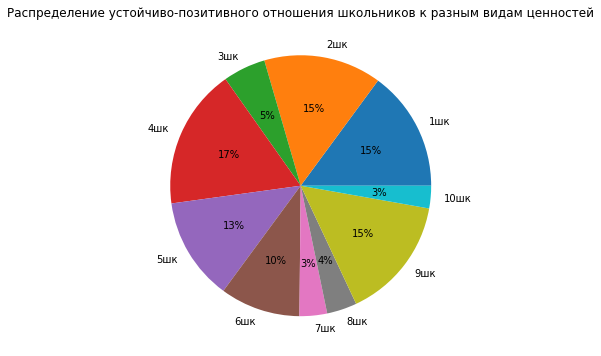

In [15]:
#оценим вес ценностей, по которым формируются разные виды отношений
df_new_p= df_new.stack()
df_new_p['устойчиво-позитивное'].plot.pie(title='Распределение устойчиво-позитивного отношения школьников к разным видам ценностей',ylabel='',autopct='%1.0f%%',figsize=(6,6))

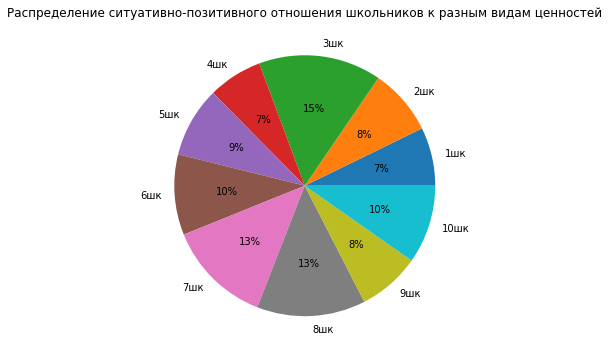

In [16]:
df_new_p['ситуативно-позитивное'].plot.pie(title='Распределение ситуативно-позитивного отношения школьников к разным видам ценностей',ylabel='',autopct='%1.0f%%',figsize=(6,6))

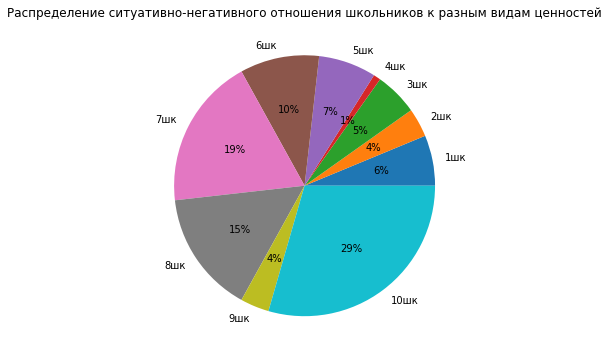

In [17]:
df_new_p['ситуативно-негативное'].plot.pie(title='Распределение ситуативно-негативного отношения школьников к разным видам ценностей',ylabel='',autopct='%1.0f%%',figsize=(6,6))

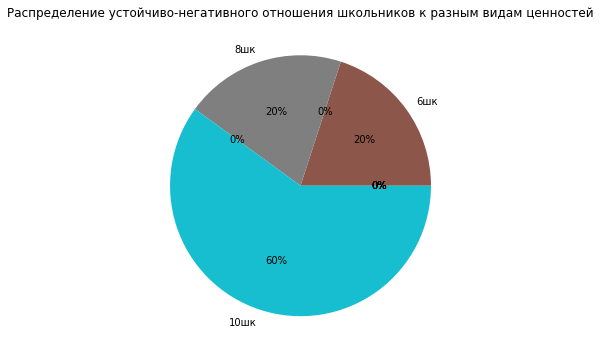

In [18]:
df_new_p['устойчиво-негативное'].plot.pie(title='Распределение устойчиво-негативного отношения школьников к разным видам ценностей',ylabel='',autopct='%1.0f%%',figsize=(6,6))

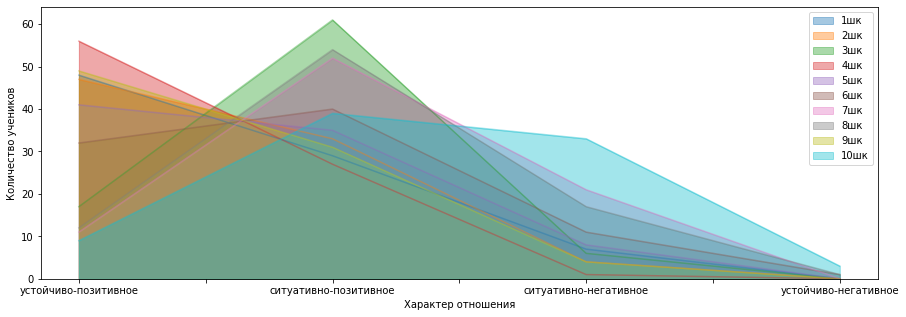

In [19]:
#оценим характер отношений учеников по всем видам ценностей
df_new.plot.area(xlabel='Характер отношения',ylabel='Количество учеников',alpha=0.4,stacked=False,figsize=(15,5))

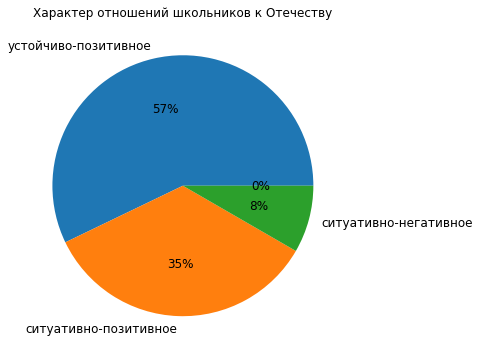

In [20]:
#сформулируем данные по каждой шкале ценностей
df_new['1шк'].plot.pie(title='Характер отношений школьников к Отечеству',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

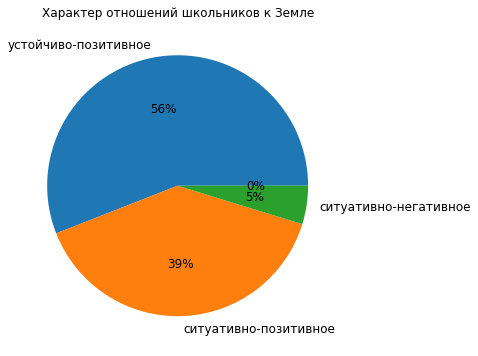

In [21]:
df_new['2шк'].plot.pie(title='Характер отношений школьников к Земле',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

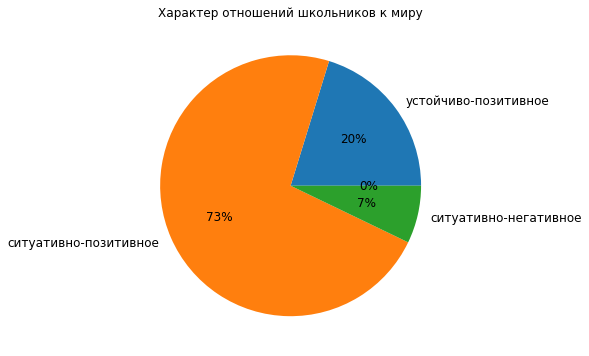

In [22]:
df_new['3шк'].plot.pie(title='Характер отношений школьников к миру',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

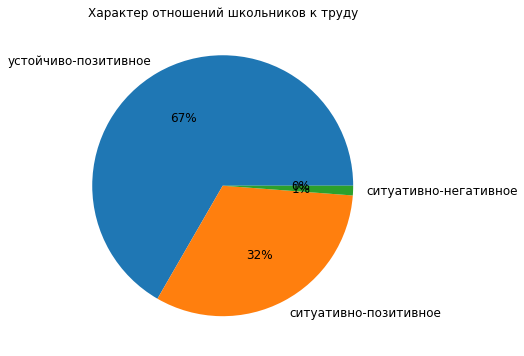

In [23]:
df_new['4шк'].plot.pie(title='Характер отношений школьников к труду',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

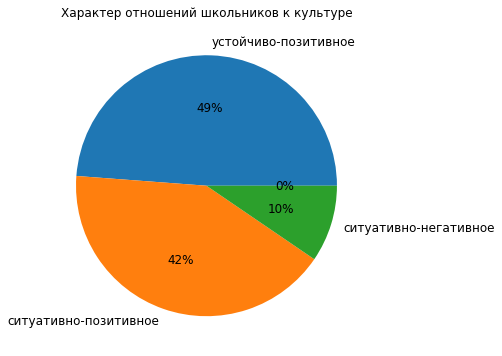

In [24]:
df_new['5шк'].plot.pie(title='Характер отношений школьников к культуре',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

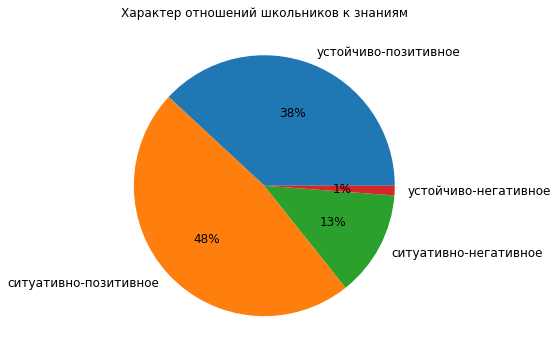

In [25]:
df_new['6шк'].plot.pie(title='Характер отношений школьников к знаниям',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

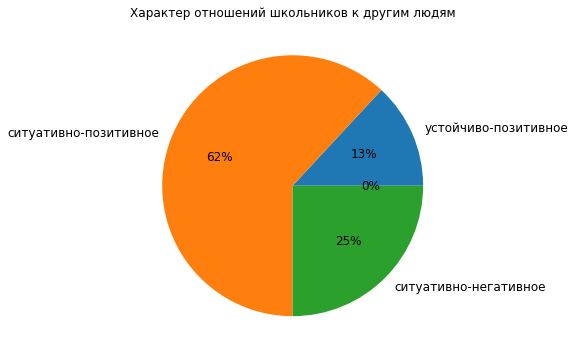

In [26]:
df_new['7шк'].plot.pie(title='Характер отношений школьников к другим людям',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

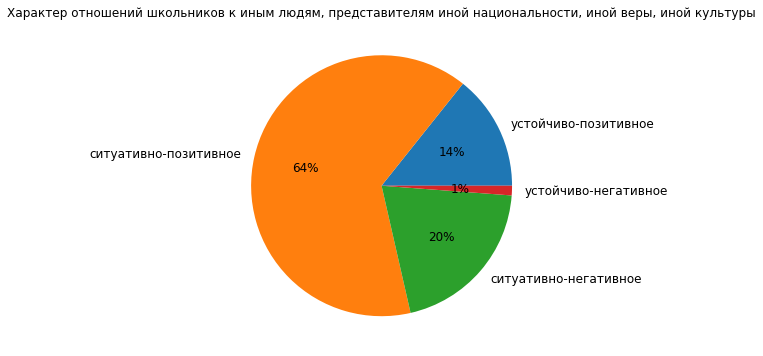

In [27]:
df_new['8шк'].plot.pie(title='Характер отношений школьников к иным людям, представителям иной национальности, иной веры, иной культуры',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

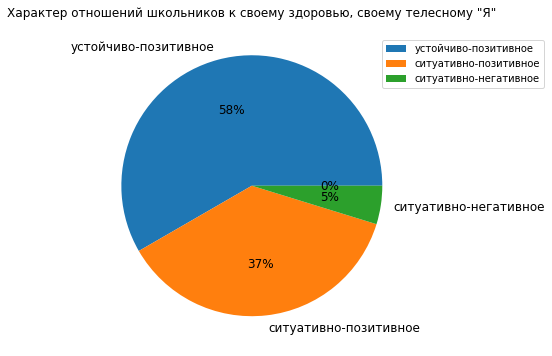

In [28]:
df_new['9шк'].plot.pie(title='Характер отношений школьников к своему здоровью, своему телесному "Я"',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6)).legend(loc=(0.9,0.8))

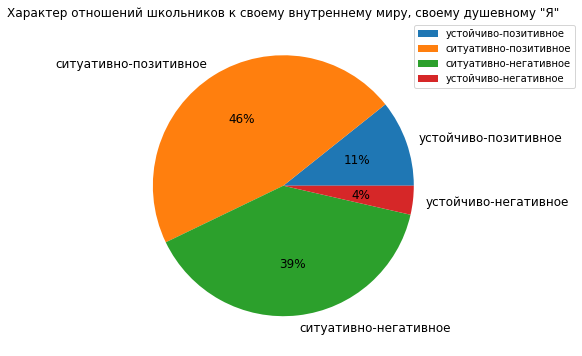

In [29]:
df_new['10шк'].plot.pie(title='Характер отношений школьников к своему внутреннему миру, своему душевному "Я"',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6)).legend(loc=(0.9,0.8))

Анализ по классам в отдельности

In [30]:
#Создаем датафреймы, по которым будем анализировать ответы школьников каждого класса в отдельности
df_5=df_s[df_s['Класс']==5]
df_6=df_s[df_s['Класс']==6]
df_7=df_s[df_s['Класс']==7]
df_8=df_s[df_s['Класс']==8]

In [33]:
df_5kl=pd.DataFrame({'1шк':df_5['Сумма,1шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '2шк':df_5['Сумма,2шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '3шк':df_5['Сумма,3шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '4шк':df_5['Сумма,4шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '5шк':df_5['Сумма,5шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '6шк':df_5['Сумма,6шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '7шк':df_5['Сумма,7шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '8шк':df_5['Сумма,8шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '9шк':df_5['Сумма,9шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '10шк':df_5['Сумма,10шк'].value_counts(bins=[-28,-14,0,14,28]),
                     'Характер отношения':['устойчиво-позитивное','ситуативно-позитивное','ситуативно-негативное','устойчиво-негативное']
                     })
df_5kl=df_5kl.set_index('Характер отношения')
df_5kl

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
Характер отношения,,,,,,,,,,
устойчиво-позитивное,15,13,5,19,12,14,5,3,15,1
ситуативно-позитивное,10,11,19,7,14,10,14,19,9,13
ситуативно-негативное,1,2,2,0,0,2,7,4,2,10
устойчиво-негативное,0,0,0,0,0,0,0,0,0,2


In [35]:
df_6kl=pd.DataFrame({'1шк':df_6['Сумма,1шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '2шк':df_6['Сумма,2шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '3шк':df_6['Сумма,3шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '4шк':df_6['Сумма,4шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '5шк':df_6['Сумма,5шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '6шк':df_6['Сумма,6шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '7шк':df_6['Сумма,7шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '8шк':df_6['Сумма,8шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '9шк':df_6['Сумма,9шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '10шк':df_6['Сумма,10шк'].value_counts(bins=[-28,-14,0,14,28]),
                     'Характер отношения':['устойчиво-позитивное','ситуативно-позитивное','ситуативно-негативное','устойчиво-негативное']
                     })
df_6kl=df_6kl.set_index('Характер отношения')
df_6kl

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
Характер отношения,,,,,,,,,,
устойчиво-позитивное,14,14,4,14,10,5,4,1,13,1
ситуативно-позитивное,5,6,15,6,7,12,15,14,7,8
ситуативно-негативное,1,0,1,0,3,3,1,5,0,10
устойчиво-негативное,0,0,0,0,0,0,0,0,0,1


In [36]:
df_7kl=pd.DataFrame({'1шк':df_7['Сумма,1шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '2шк':df_7['Сумма,2шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '3шк':df_7['Сумма,3шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '4шк':df_7['Сумма,4шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '5шк':df_7['Сумма,5шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '6шк':df_7['Сумма,6шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '7шк':df_7['Сумма,7шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '8шк':df_7['Сумма,8шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '9шк':df_7['Сумма,9шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '10шк':df_7['Сумма,10шк'].value_counts(bins=[-28,-14,0,14,28]),
                     'Характер отношения':['устойчиво-позитивное','ситуативно-позитивное','ситуативно-негативное','устойчиво-негативное']
                     })
df_7kl=df_7kl.set_index('Характер отношения')
df_7kl

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
Характер отношения,,,,,,,,,,
устойчиво-позитивное,10,12,3,15,11,10,0,1,14,3
ситуативно-позитивное,8,7,15,4,8,8,11,13,5,12
ситуативно-негативное,1,0,1,0,0,1,8,5,0,4
устойчиво-негативное,0,0,0,0,0,0,0,0,0,0


In [37]:
df_8kl=pd.DataFrame({'1шк':df_8['Сумма,1шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '2шк':df_8['Сумма,2шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '3шк':df_8['Сумма,3шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '4шк':df_8['Сумма,4шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '5шк':df_8['Сумма,5шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '6шк':df_8['Сумма,6шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '7шк':df_8['Сумма,7шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '8шк':df_8['Сумма,8шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '9шк':df_8['Сумма,9шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '10шк':df_8['Сумма,10шк'].value_counts(bins=[-28,-14,0,14,28]),
                     'Характер отношения':['устойчиво-позитивное','ситуативно-позитивное','ситуативно-негативное','устойчиво-негативное']
                     })
df_8kl=df_8kl.set_index('Характер отношения')
df_8kl

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
Характер отношения,,,,,,,,,,
устойчиво-позитивное,9,8,5,8,8,3,2,7,7,4
ситуативно-позитивное,6,9,12,10,6,10,12,8,10,6
ситуативно-негативное,4,2,2,1,5,5,5,3,2,9
устойчиво-негативное,0,0,0,0,0,1,0,1,0,0


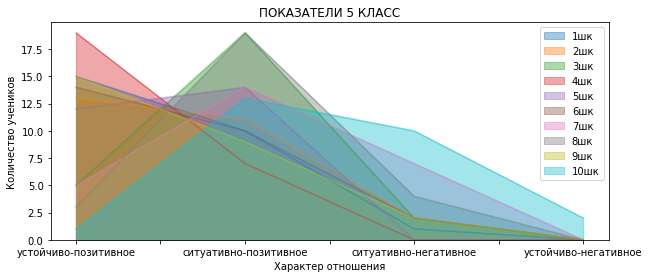

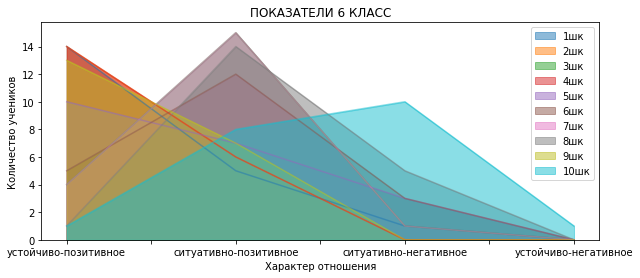

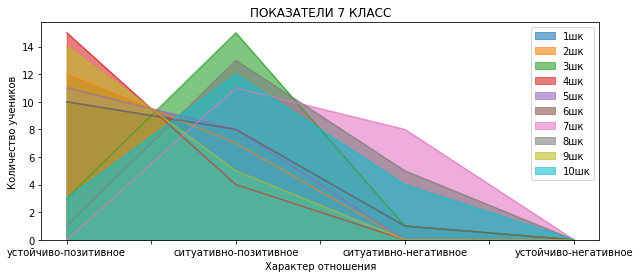

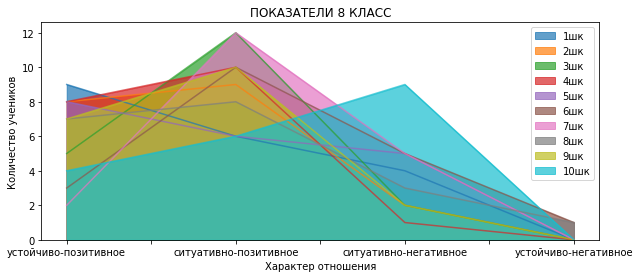

In [158]:
df_5kl.plot.area(title='ПОКАЗАТЕЛИ 5 КЛАСС',xlabel='Характер отношения',ylabel='Количество учеников',alpha=0.4,stacked=False,figsize=(10,4))
df_6kl.plot.area(title='ПОКАЗАТЕЛИ 6 КЛАСС',xlabel='Характер отношения',ylabel='Количество учеников',alpha=0.5,stacked=False,figsize=(10,4))
df_7kl.plot.area(title='ПОКАЗАТЕЛИ 7 КЛАСС',xlabel='Характер отношения',ylabel='Количество учеников',alpha=0.6,stacked=False,figsize=(10,4))
df_8kl.plot.area(title='ПОКАЗАТЕЛИ 8 КЛАСС',xlabel='Характер отношения',ylabel='Количество учеников',alpha=0.7,stacked=False,figsize=(10,4))


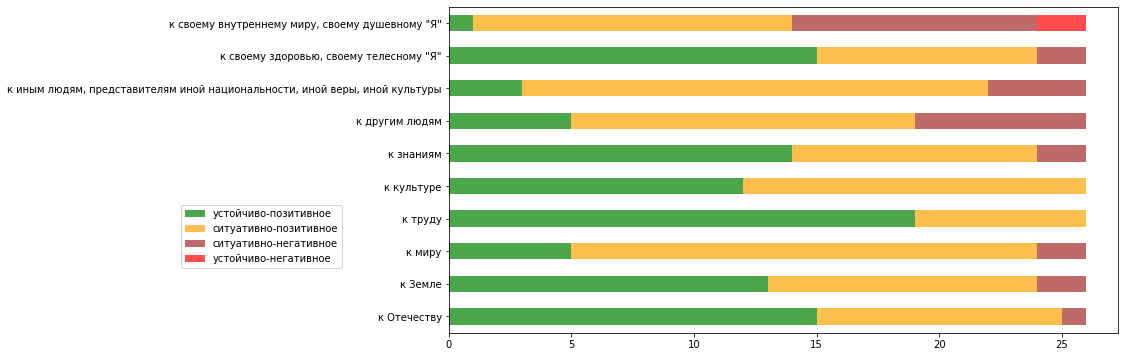

In [157]:
df_5kl.transpose().rename(dict).plot.barh(stacked=True,figsize=(12,6),alpha=0.7,color=('g','orange','brown','r')).legend(loc=(-0.4,0.2))

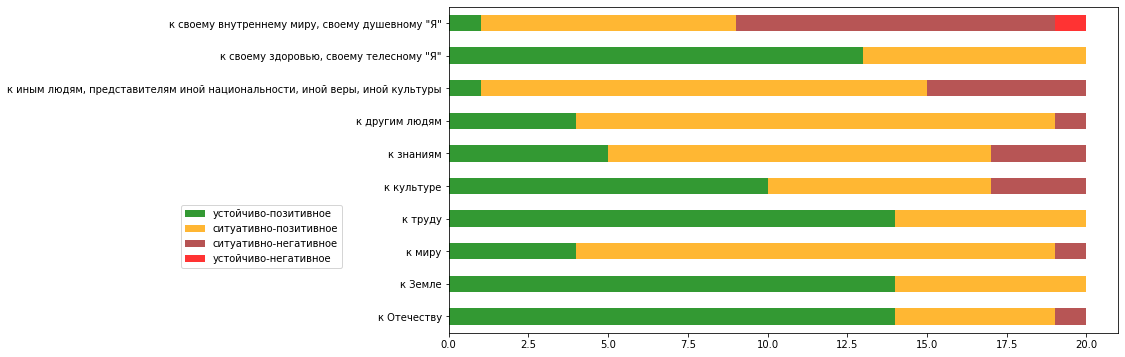

In [156]:
df_6kl.transpose().rename(dict).plot.barh(stacked=True,figsize=(12,6),alpha=0.8,color=('g','orange','brown','r')).legend(loc=(-0.4,0.2))

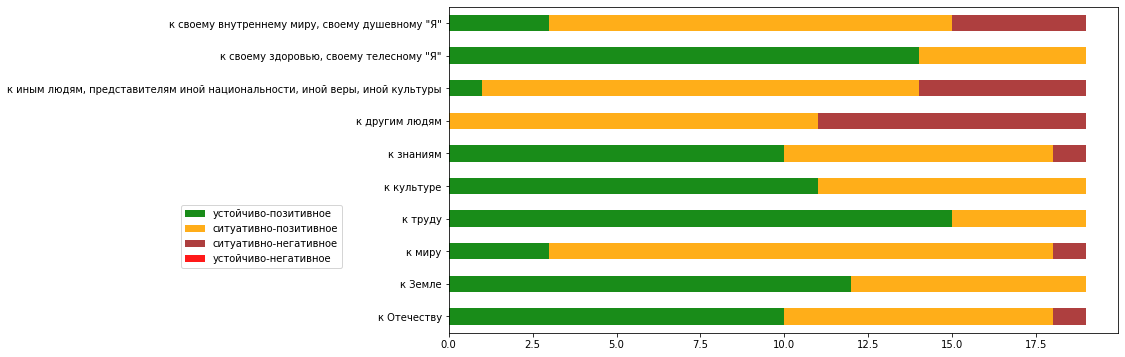

In [155]:
df_7kl.transpose().rename(dict).plot.barh(stacked=True,figsize=(12,6),alpha=0.9,color=('g','orange','brown','r')).legend(loc=(-0.4,0.2))

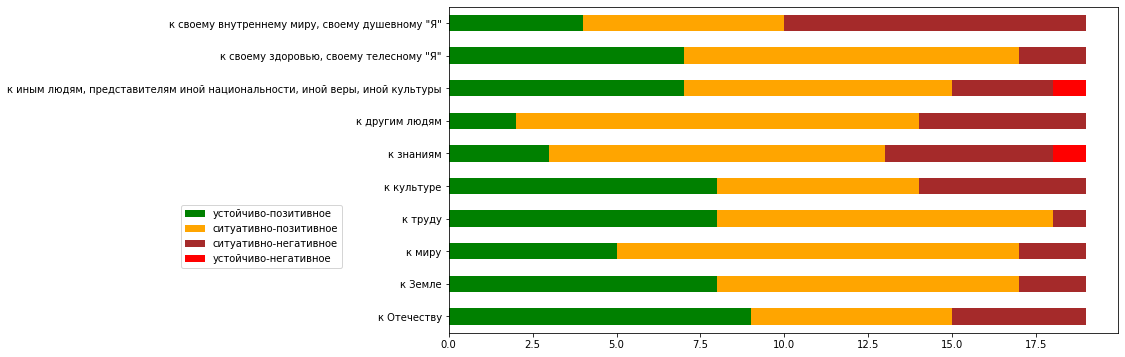

In [154]:
df_8kl.transpose().rename(dict).plot.barh(stacked=True,figsize=(12,6),alpha=1,color=('g','orange','brown','r')).legend(loc=(-0.4,0.2))